# Exploratory analysis

## Setup

In [34]:
import os
import importlib
import sys

LIB_DIR = './lib'

os.makedirs(LIB_DIR, exist_ok=True)
sys.path.append(LIB_DIR)

def install_package(package_name):
    try:
        importlib.import_module(package_name)
        print(f"{package_name} is already installed")
    except ImportError:
        print(f"Installing {package_name}")
        %pip install --quiet $package_name --progress-bar on

def download_lib(filename, url):
    LIB_PATH = os.path.join(LIB_DIR, filename)
    if not os.path.exists(LIB_PATH):
        print(f"Downloading {filename}")
        import urllib.request
        urllib.request.urlretrieve(url, LIB_PATH)
        print(f"Downloaded {filename} to {LIB_PATH}")
    else:
        print(f"{filename} already downloaded")


import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler, rcdefaults
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

download_lib("visualization.py", "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py")

import visualization # type: ignore
importlib.reload(visualization)

install_package("category_encoders")
import category_encoders as ce

import plotly.express as px
import textwrap

plt.rcParams["font.family"] = "monospace"

visualization.py already downloaded
category_encoders is already installed


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def set_plot_style():
    sns.set_theme(style="whitegrid")
    sns.set_palette("pastel")
    plt.rcParams.update({
        'figure.figsize': (8, 5),
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'axes.titlepad': 20,
        'axes.spines.top': False,
        'axes.spines.right': False
    })

# Chamar logo após definir a função
set_plot_style()

In [36]:
files_path = ''

if 'google.colab' in str(get_ipython()): # type: ignore
    print('TO DO: Set up Google Colab')
    # print('Running in Google Colab')
    # from google.colab import drive
    # mount_point = '/content/drive'
    # drive.mount(mount_point)
    # files_path = mount_point + '/MyDrive/Colab Notebooks/'
else:
    print('Running locally')
    files_path = '../data/'

Running locally


In [37]:
from cycler import cycler
import matplotlib.pyplot as plt

plt.rcdefaults()

colors = cycler('color', [
    '#4538ff', '#6436ea', '#8334d5',
    '#a232c0', '#c12faa', '#e02d95', '#ff2b80'
])

plt.rc('axes', facecolor='white', edgecolor='gray',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='black', titlesize=16, labelsize=14)

plt.rc('grid', color='lightgray', linestyle='--', linewidth=0.6)
plt.rc('xtick', direction='out', color='black', labelsize=12)
plt.rc('ytick', direction='out', color='black', labelsize=12)
plt.rc('patch', edgecolor='white')
plt.rc('lines', linewidth=2.2)
plt.rc('text', color='black')


## 1. Exploratory analysis

In [38]:
german_df = pd.read_csv(files_path + 'syntetic_sample.csv')

In [39]:
german_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   sex                      1000000 non-null  object
 1   marrital_status          1000000 non-null  object
 2   age                      1000000 non-null  int64 
 3   n_of_liables             1000000 non-null  int64 
 4   job                      1000000 non-null  object
 5   foreign_worker           1000000 non-null  int64 
 6   present_employee_since   1000000 non-null  object
 7   telephone                1000000 non-null  int64 
 8   housing                  1000000 non-null  object
 9   present_residence_since  1000000 non-null  int64 
 10  property                 1000000 non-null  object
 11  checking_account         1000000 non-null  object
 12  savings                  1000000 non-null  object
 13  purpose                  1000000 non-null  object
 14  cre

In [40]:
german_df.head()

,sex,marrital_status,age,n_of_liables,job,foreign_worker,present_employee_since,telephone,housing,present_residence_since,...,checking_account,savings,purpose,credit_history,duration,credit_amount,guarantors,other_installment_plans,credits_at_bank,risk
0,female,divorced,58,1,unskilled resident,1,>=7y,0,for free,4,...,< 0 DM,<100 DM,used car,5,48,6416,none,bank,2,0
1,male,single,47,1,qualified,1,1-4y,0,own,3,...,>= 200 DM,100-500 DM,business,3,36,8229,none,none,4,0
2,male,married/widowed,35,1,qualified,1,>=7y,1,own,1,...,< 0 DM,100-500 DM,radio/television,3,48,6999,none,bank,1,0
3,female,divorced,26,1,highly qualified,1,unemployed,1,rent,4,...,no checking account,0 or unk.,used car,3,48,9055,none,none,1,1
4,male,single,43,2,highly qualified,1,>=7y,1,own,4,...,0 <= ... < 200 DM,100-500 DM,radio/television,5,24,1175,none,none,1,0


In [41]:
non_numerical_cols = list(german_df.select_dtypes(exclude=[np.number]).columns)
print("Non-numerical columns:")
non_numerical_cols

Non-numerical columns:


['sex',
 'marrital_status',
 'job',
 'present_employee_since',
 'housing',
 'property',
 'checking_account',
 'savings',
 'purpose',
 'guarantors',
 'other_installment_plans']

In [42]:
for col in non_numerical_cols:
    print(f"Unique values in {col}:")
    print(german_df[col].unique())
    print()

Unique values in sex:
['female' 'male']

Unique values in marrital_status:
['divorced' 'single' 'married/widowed']

Unique values in job:
['unskilled resident' 'qualified' 'highly qualified'
 'unemployed/unskilled non-resident']

Unique values in present_employee_since:
['>=7y' '1-4y' 'unemployed' '<1y' '4-7y']

Unique values in housing:
['for free' 'own' 'rent']

Unique values in property:
['unk. / no property' 'real estate' 'building society / life insurance'
 'car or other']

Unique values in checking_account:
['< 0 DM' '>= 200 DM' 'no checking account' '0 <= ... < 200 DM']

Unique values in savings:
['<100 DM' '100-500 DM' '0 or unk.' '500-1000 DM' '>1000 DM']

Unique values in purpose:
['used car' 'business' 'radio/television' 'education'
 'furniture/equipment' 'new car' 'repairs' 'retraining' 'others'
 'domestic appliances']

Unique values in guarantors:
['none' 'guarantor' 'co-applicant']

Unique values in other_installment_plans:
['bank' 'none' 'stores']



In [43]:
ordinal_non_numeric_cols = ['present_employee_since', 'checking_account', 'savings', 'job']
non_ordinal_non_numeric_cols = list(set(non_numerical_cols) - set(ordinal_non_numeric_cols))
numeric_cols = list(german_df.select_dtypes(include=[np.number]).columns)

In [44]:
print("Ordinal non-numerical columns:")
ordinal_non_numeric_cols

Ordinal non-numerical columns:


['present_employee_since', 'checking_account', 'savings', 'job']

In [45]:
print("Non-ordinal non-numerical columns:")
non_ordinal_non_numeric_cols

Non-ordinal non-numerical columns:


['housing',
 'marrital_status',
 'property',
 'other_installment_plans',
 'purpose',
 'sex',
 'guarantors']

In [46]:
print("Numerical columns:")
numeric_cols

Numerical columns:


['age',
 'n_of_liables',
 'foreign_worker',
 'telephone',
 'present_residence_since',
 'credit_history',
 'duration',
 'credit_amount',
 'credits_at_bank',
 'risk']

In [47]:
german_ea = german_df.copy()
german_ea['risk'] = german_ea['risk'].map({0: 'bad', 1: 'good'})
german_ea['age_group'] = pd.cut(german_ea['age'], bins=[18, 25, 32, 45, 55, 60, 100], labels=['18-25', '26-32', '33-45', '46-54', '55-60', '60+'])

In [48]:
def plot_secondary(group_by, custom_order=None):
  risk_counts = german_ea.groupby([group_by], observed=True)['risk'].value_counts(normalize=True).unstack('risk')
  total_counts = german_ea.groupby([group_by], observed=True)['risk'].count()

  if custom_order:
    risk_counts = risk_counts.reindex(custom_order)
    total_counts = total_counts.reindex(custom_order)

  ax = total_counts.plot(kind='bar', color = '#4538FF')
  ax.set_ylabel('# Customers')
  ax.set_xlabel(f'{group_by.capitalize()}')
  ax.set_title(f'Risk Distribution by {group_by.capitalize().replace("_", " ")}')

  ax.set_xticklabels(
      [textwrap.fill(label, width=10) for label in total_counts.index],
      rotation=0,
      ha='center')

  ax2 = ax.twinx()
  ax2.set_yticks([])
  ax2.grid(False)
  ax2.set_ylim(0, 1)

  ax2.plot(risk_counts['bad'], marker='o', linestyle='-', color = '#FF2B80', linewidth=2, label='Bad Risk %')
  ax2.legend()

  for i, value in enumerate(risk_counts['bad']):
      ax2.annotate(f'{value:.2f}%',
                  xy=(i, value),
                  xytext=(3, 10),  # Offset the text slightly for visibility
                  textcoords='offset points',
                  ha='center',
                  va='bottom',
                  fontweight = 'bold',
                  color = '#FF2B80',
                  fontsize=10,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

### 1. Age distribution

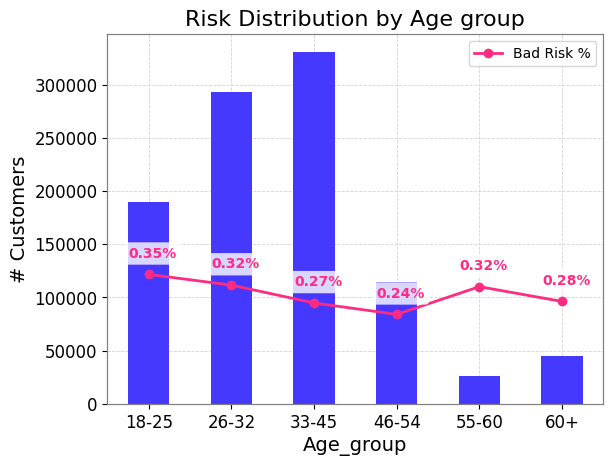

In [49]:
plot_secondary('age_group')


### 2. Sex x Risk

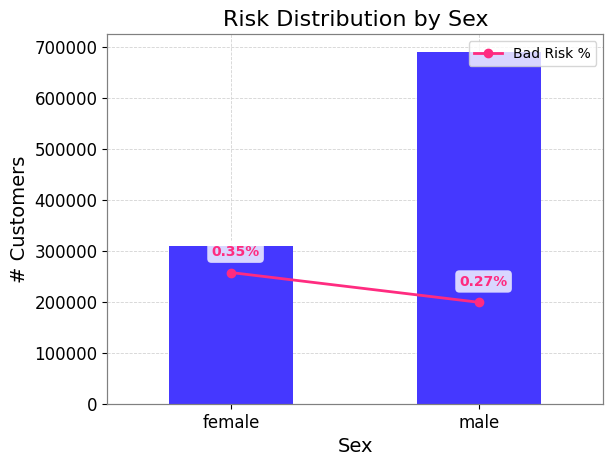

In [50]:
plot_secondary('sex')

### 3. Credit amount x Risk

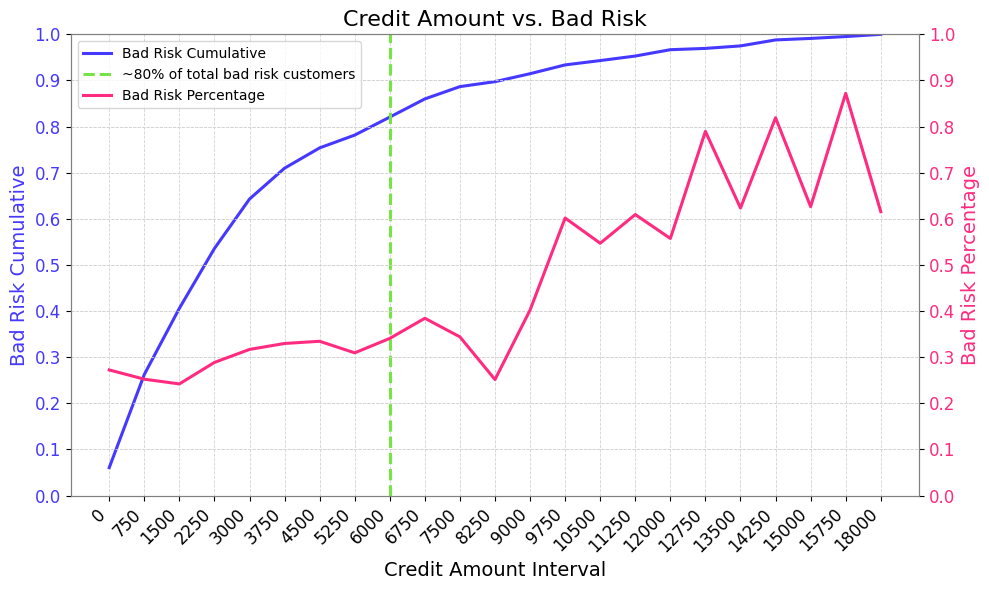

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))

total_bad_risk = german_ea[german_ea['risk'] == 'bad'].shape[0]
german_ea['credit_bin'] = pd.cut(german_ea['credit_amount'], bins=range(0, german_ea['credit_amount'].max() + 750, 750))

# Group by credit bin and calculate the percentage of bad risk customers
bad_risk_percentage = german_ea.groupby('credit_bin', observed=True)['risk'].value_counts(normalize=True).unstack()['bad']
bad_risk_in_credit_bin = (german_ea[german_ea['risk']=='bad'].groupby('credit_bin', observed=True)['risk'].count()/total_bad_risk).cumsum()
credit_bin_plot = pd.merge(bad_risk_in_credit_bin.to_frame(name='bad_risk_in_credit_bin'),
                     bad_risk_percentage.to_frame(name='bad_risk_percentage'),
                     left_index=True, right_index=True, how='inner')

credit_bin_plot.drop(credit_bin_plot[credit_bin_plot['bad_risk_percentage']==0].index, inplace=True)

# Plot bad_risk_in_credit_bin on the primary y-axis
credit_bin_plot.index = credit_bin_plot.index.astype(str)
ax1.plot(credit_bin_plot.index, credit_bin_plot['bad_risk_in_credit_bin'], color='#4538FF', label='Bad Risk Cumulative')
ax1.set_xlabel('Credit Amount Interval')
ax1.set_ylabel('Bad Risk Cumulative', color='#4538FF')
ax1.tick_params(axis='y', labelcolor='#4538FF')
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))


# Create a secondary y-axis for bad_risk_percentage
ax2 = ax1.twinx()
ax2.plot(credit_bin_plot.index, credit_bin_plot['bad_risk_percentage'], color='#FF2B80', label='Bad Risk Percentage')
ax2.set_ylabel('Bad Risk Percentage', color='#FF2B80')
ax2.tick_params(axis='y', labelcolor='#FF2B80')
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))


# Find the x-value where bad_risk_in_credit_bin reaches 0.8
threshold_x = credit_bin_plot[credit_bin_plot['bad_risk_in_credit_bin'] >= 0.8].index[0]

# Add a vertical line at the threshold
ax1.axvline(x=threshold_x, color='#75e545', linestyle='--', label=f'~80% of total bad risk customers')

ax1.set_xticks(range(len(credit_bin_plot.index)))

# Customize x-axis labels to only show the interval start
ax1.set_xticklabels([label.split(', ')[0][1:] for label in credit_bin_plot.index], rotation=45, ha='right')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.title('Credit Amount vs. Bad Risk')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### 4. Jobs x Risk

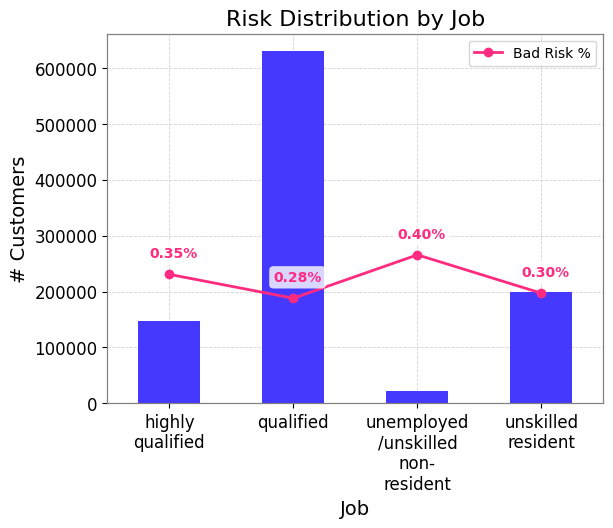

In [52]:
plot_secondary('job')

### 5. Employee since x Risk

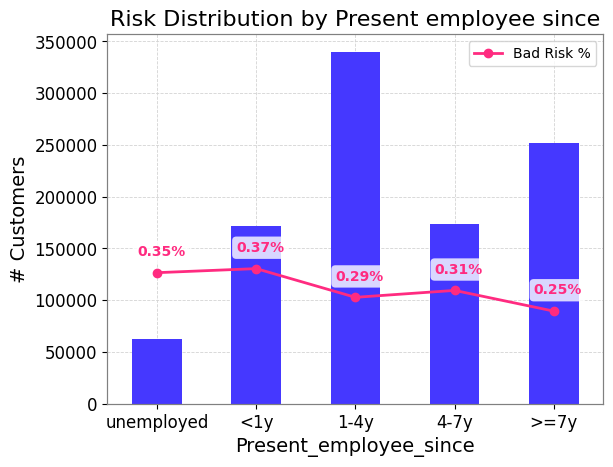

In [53]:
custom_order = ['unemployed', '<1y', '1-4y', '4-7y', '>=7y']
plot_secondary('present_employee_since', custom_order)

### 6. Savings x Risk

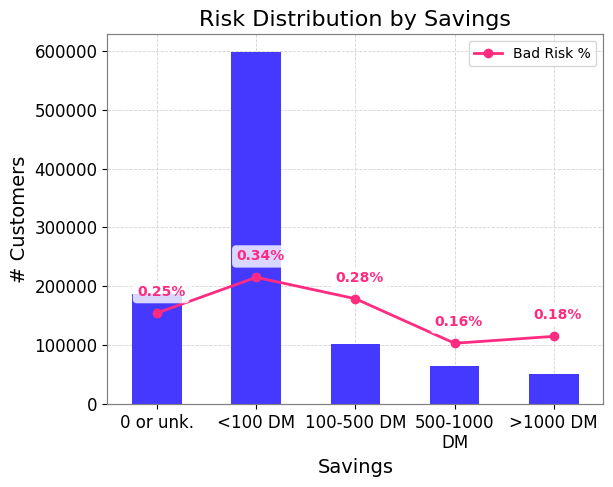

In [54]:
plot_secondary('savings', ['0 or unk.', '<100 DM', '100-500 DM', '500-1000 DM', '>1000 DM'])

### 7. Checking account x Risk

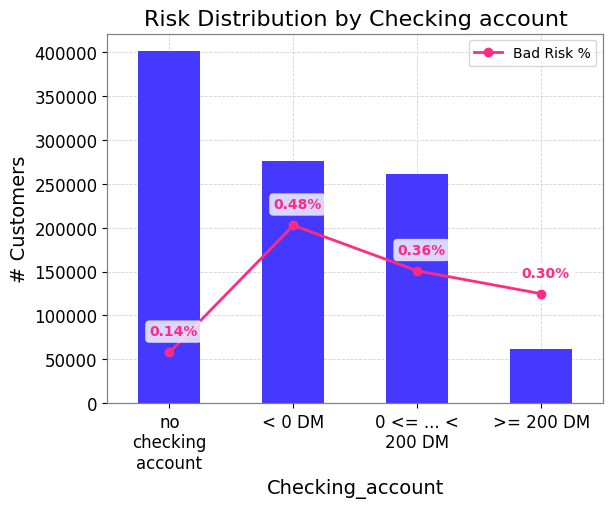

In [55]:
plot_secondary('checking_account', ['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM'])

### 8. Correlation Matrix

In [56]:
mappings = {
    'sex': {
        'female': 0,
        'male': 1
    },
    'present_employee_since': {
        'unemployed': 0, '<1y': 1, '1-4y': 2, '4-7y': 3, '>=7y': 4
    },
    'checking_account': {
        'no checking account': 0, '< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM': 3
    },
    'savings': {
        '0 or unk.': 0, '<100 DM': 1, '100-500 DM': 2, '500-1000 DM': 3, '>1000 DM': 4
    },
    'job': {
        'unemployed/unskilled non-resident': 0,
        'unskilled resident': 1,
        'qualified': 2,
        'highly qualified': 3
    }
}

german_preprocessed_df = german_df.copy()

for col, mapping in mappings.items():
    german_preprocessed_df[col] = german_preprocessed_df[col].map(mapping).astype(int)

In [57]:
german_preprocessed_df.describe()

,sex,age,n_of_liables,job,foreign_worker,present_employee_since,telephone,present_residence_since,checking_account,savings,credit_history,duration,credit_amount,credits_at_bank,risk
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.690214,35.543537,1.154928,1.904031,0.964186,2.381044,0.409216,2.849000,0.983341,1.194099,3.526561,21.089686,3293.168459,1.409542,0.700788
std,0.462406,11.365641,0.361836,0.653224,0.185826,1.208043,0.491689,1.112627,0.954029,0.978553,1.102854,12.385466,2846.335833,0.592044,0.457913
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,250.000000,1.000000,0.000000
25%,0.000000,27.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,3.000000,12.000000,1360.000000,1.000000,0.000000
50%,1.000000,33.000000,1.000000,2.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,3.000000,18.000000,2326.000000,1.000000,1.000000
75%,1.000000,42.000000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,2.000000,1.000000,5.000000,24.000000,3966.000000,2.000000,1.000000
max,1.000000,75.000000,2.000000,3.000000,1.000000,4.000000,1.000000,4.000000,3.000000,4.000000,5.000000,72.000000,18424.000000,4.000000,1.000000


In [58]:
german_dummies_df = pd.get_dummies(german_preprocessed_df, dtype=int, drop_first=True)

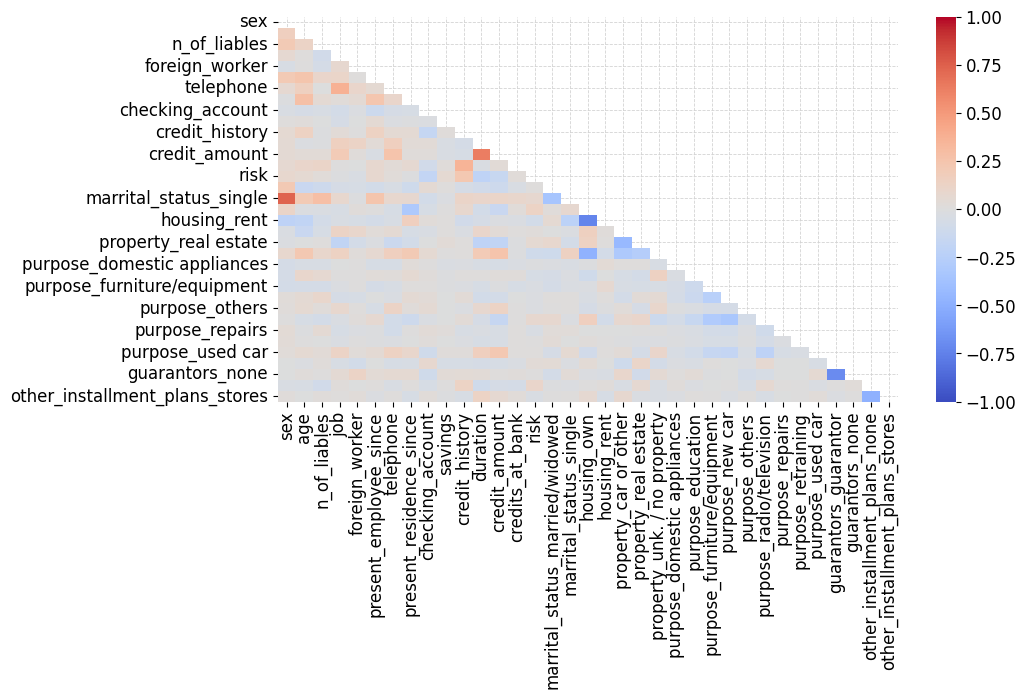

In [59]:
visualization.plot_corr(german_dummies_df, width=10, height=5, print_value=False)